In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 17572 files belonging to 38 classes.
['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Tw

In [4]:
import tensorflow as tf
print(tf.__version__)

2.13.0


In [7]:
cnn = tf.keras.models.load_model('trained_plant_disease_model.keras', compile=False)
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 262.6 kB/s eta 0:02:27
   ---------------------------------------- 0.0/38.6 MB 245.8 kB/s eta 0:02:37
   ---------------------------------------- 0.1/38.6 MB 435.7 kB/s eta 0:01:29
   ---------------------------------------- 0.1/38.6 MB 481.4 kB/s eta 0:01:20
   ---------------------------------------- 0.2/38.6 MB 583.1 kB/s eta 0:01:06
   ---------------------------------------- 0.2/38.6 MB 593.2 kB/s eta 0:01:05
   ---------------------------------------- 0.3/38.6 MB 655.4 kB/s eta 0:00:59
   ---------------------------------------- 0.3/38.6 MB 728.0 kB/s eta 0:00:53
   ---------------

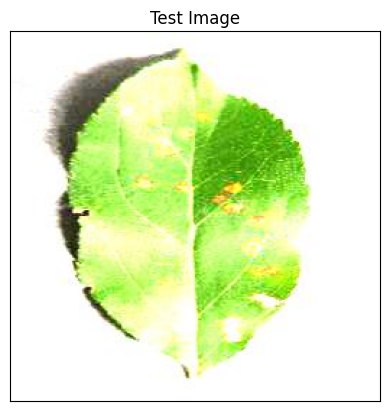

In [10]:
#Test Image Visualization
import cv2
image_path = 'test/test/AppleCedarRust1.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [11]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 321ms/step


In [12]:
print(predictions)

[[2.94478305e-05 1.59251314e-04 9.90999520e-01 2.57253248e-07
  1.70002422e-05 8.61697936e-06 1.31125404e-08 2.87070930e-06
  1.30067712e-09 2.15925198e-07 6.53163745e-10 1.12557365e-03
  3.59794200e-07 2.84386328e-08 5.02068224e-06 3.16553705e-05
  3.50711111e-04 4.56667919e-07 6.60241488e-03 5.77470382e-06
  1.26719681e-06 1.35087630e-05 7.36238917e-07 2.54012225e-08
  2.93275360e-09 2.12971134e-08 4.95727761e-07 8.88515478e-06
  9.54986808e-06 5.68488322e-04 4.94602427e-05 1.42055328e-07
  2.90997423e-06 8.36376302e-08 4.85007058e-06 3.46014332e-07
  1.14099219e-08 1.18926785e-07]]


In [13]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

2


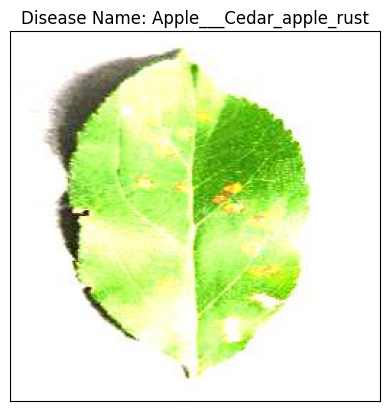

In [14]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()

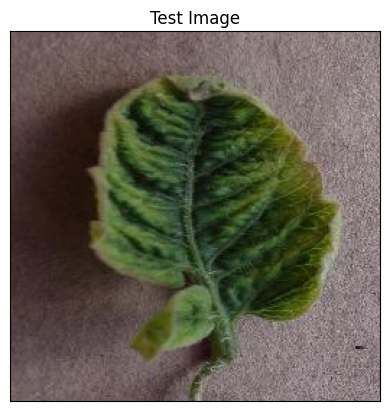

In [15]:
#Test Image Visualization
import cv2
image_path = 'test/test/TomatoYellowCurlVirus2.JPG'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [16]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 51ms/step


In [17]:
print(predictions)

[[1.90260223e-15 6.77039046e-16 2.08801336e-12 8.69861214e-12
  8.70503891e-15 6.01317932e-13 2.06382860e-16 5.73126633e-16
  2.54506851e-16 5.09514194e-16 4.62998585e-16 2.92542691e-11
  1.91998305e-12 6.58306135e-12 2.31215457e-16 5.63526049e-12
  1.70616576e-14 9.66810606e-16 1.16016308e-09 2.45128164e-13
  1.12076660e-16 3.77751060e-11 3.98031055e-13 1.41759438e-10
  1.76418152e-13 2.06744073e-13 1.85969716e-13 4.80021364e-15
  1.46190615e-08 2.51136157e-07 5.79584080e-12 3.38277872e-09
  4.35556365e-12 7.85210674e-10 3.13070472e-11 9.99999762e-01
  1.01239904e-12 3.39410919e-16]]


In [18]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

35


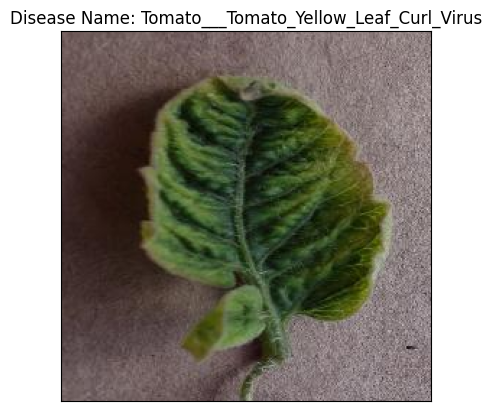

In [19]:
# Displaying the disease prediction
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()